In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Sales_dataset1.xlsx')

### Data Inspection

In [2]:
df.head()

,Date,Customer ID,Age,Gender,City,Country,Budget,Purchase Type,Product Type,Product Category,Product Name,Payment Method,Quantity,CP,SP,Total Sales,Profit
0,2018-01-01,CD-38182,11.0,Female,Stockholm,Sweden,High,In-store,Children,Toys,Hot Wheels Car Set,Cash,2,59.00,70.800,141.600,23.600
1,2018-01-01,CD-29226,7.0,Male,The Hague,Netherlands,Medium,In-store,Children,Toys,Hot Wheels Car Set,Cash,1,59.00,70.800,141.600,23.600
2,2018-01-01,CD-25582,9.0,Female,Berlin,Germany,Medium,In-store,Children,Toys,Barbie Doll,Cash,1,38.94,46.728,46.728,7.788
3,2018-01-01,CD-18071,11.0,Male,Naples,Italy,High,In-store,Children,Toys,Barbie Doll,Cash,1,38.94,46.728,46.728,7.788
4,2018-01-01,CD-24188,7.0,Male,Ghent,Belgium,High,In-store,Children,Toys,Hot Wheels Car Set,Cash,1,59.00,70.800,141.600,23.600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              15000 non-null  datetime64[ns]
 1   Customer ID       15000 non-null  object        
 2   Age               14921 non-null  float64       
 3   Gender            15000 non-null  object        
 4   City              15000 non-null  object        
 5   Country           15000 non-null  object        
 6   Budget            15000 non-null  object        
 7   Purchase Type     14976 non-null  object        
 8   Product Type      15000 non-null  object        
 9   Product Category  15000 non-null  object        
 10  Product Name      14987 non-null  object        
 11  Payment Method    14794 non-null  object        
 12  Quantity          15000 non-null  int64         
 13  CP                15000 non-null  float64       
 14  SP                1500

In [4]:
df.describe()

,Age,Quantity,CP,SP,Total Sales,Profit
count,14921.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,22.486093,4.166000,170.703917,211.839528,508.662151,102.788456
std,20.067910,5.407402,307.754462,386.701205,1618.977949,367.982702
min,7.000000,1.000000,11.500000,13.570000,13.570000,1.770000
25%,10.000000,1.000000,33.040000,41.064000,63.720000,10.148000
50%,13.000000,2.000000,53.100000,63.720000,141.600000,23.600000
75%,27.000000,4.000000,135.700000,167.040000,402.144000,75.520000
max,80.000000,30.000000,1416.000000,1770.000000,43102.800000,9946.800000


In [5]:
df.shape

(15000, 17)

In [6]:
df.nunique()

Date                  350
Customer ID         14958
Age                    74
Gender                  2
City                   36
Country                10
Budget                  3
Purchase Type           2
Product Type            3
Product Category       13
Product Name           18
Payment Method          5
Quantity               10
CP                    756
SP                    863
Total Sales          2004
Profit               2056
dtype: int64

### Correcting data type

In [7]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').astype('Int64')
print(df.dtypes)

Date                datetime64[ns]
Customer ID                 object
Age                          Int64
Gender                      object
City                        object
Country                     object
Budget                      object
Purchase Type               object
Product Type                object
Product Category            object
Product Name                object
Payment Method              object
Quantity                     int64
CP                         float64
SP                         float64
Total Sales                float64
Profit                     float64
dtype: object


Data types are now set correctly

### Checking for Null values

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

Date                  0
Customer ID           0
Age                  79
Gender                0
City                  0
Country               0
Budget                0
Purchase Type        24
Product Type          0
Product Category      0
Product Name         13
Payment Method      206
Quantity              0
CP                    0
SP                    0
Total Sales           0
Profit                0
dtype: int64


Columns 'Age', 'Purchase Type','Product Name' and 'Payment Method' have null values. Since 'Purchase Type','Product Name' and 'Payment Method' are discrete datatype, its null values will be imputed with its mode, whereas 'Age' needs to be checked for outliers as null values of continuous data having outliers is replaced with median and mean is imputed in case of no outliers.

In [9]:
df1 = [ 'Purchase Type', 'Product Name', 'Payment Method']

In [10]:
for i in df1:
    mode_value = df[i].mode()[0]
    df[i].fillna(mode_value, inplace=True)

In [11]:
df.isnull().sum()

Date                 0
Customer ID          0
Age                 79
Gender               0
City                 0
Country              0
Budget               0
Purchase Type        0
Product Type         0
Product Category     0
Product Name         0
Payment Method       0
Quantity             0
CP                   0
SP                   0
Total Sales          0
Profit               0
dtype: int64

Mode Imputation for categorical data is done

### Detecting Outliers

<AxesSubplot:>

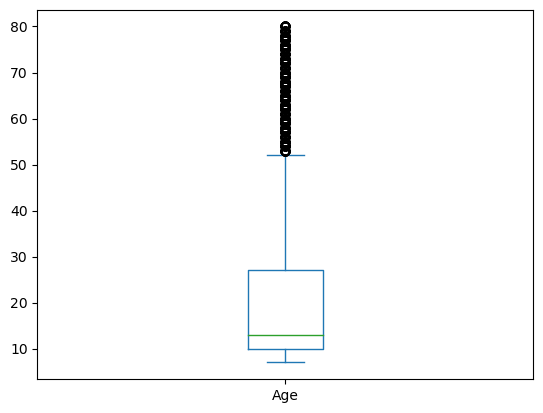

In [12]:
df['Age'].plot(kind='box')

As can be seen from the plot, 'Age' does have a cluster of outliers at the upper end, all at the age of 80, hence will be imputed with its median

In [13]:
Age_median = df['Age'].median()

df['Age'].fillna(Age_median, inplace=True)

In [14]:
df.isna().sum()

Date                0
Customer ID         0
Age                 0
Gender              0
City                0
Country             0
Budget              0
Purchase Type       0
Product Type        0
Product Category    0
Product Name        0
Payment Method      0
Quantity            0
CP                  0
SP                  0
Total Sales         0
Profit              0
dtype: int64

Now there are no null values in the dataset

In [15]:
df.drop_duplicates()

,Date,Customer ID,Age,Gender,City,Country,Budget,Purchase Type,Product Type,Product Category,Product Name,Payment Method,Quantity,CP,SP,Total Sales,Profit
0,2018-01-01,CD-38182,11,Female,Stockholm,Sweden,High,In-store,Children,Toys,Hot Wheels Car Set,Cash,2,59.00,70.800,141.600,23.600
1,2018-01-01,CD-29226,7,Male,The Hague,Netherlands,Medium,In-store,Children,Toys,Hot Wheels Car Set,Cash,1,59.00,70.800,141.600,23.600
2,2018-01-01,CD-25582,9,Female,Berlin,Germany,Medium,In-store,Children,Toys,Barbie Doll,Cash,1,38.94,46.728,46.728,7.788
3,2018-01-01,CD-18071,11,Male,Naples,Italy,High,In-store,Children,Toys,Barbie Doll,Cash,1,38.94,46.728,46.728,7.788
4,2018-01-01,CD-24188,7,Male,Ghent,Belgium,High,In-store,Children,Toys,Hot Wheels Car Set,Cash,1,59.00,70.800,141.600,23.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14992,2022-01-14,CD-48220,12,Male,Paris,France,Medium,Online,Teen,Board Games,Chess Set,PayPal,20,17.70,20.355,407.100,53.100
14993,2022-01-14,CD-17742,71,Female,Brussels,Belgium,Low,In-store,Adult,Accessories,Ray-Ban Sunglasses,Credit Card,1,107.38,128.856,128.856,21.476
14994,2022-01-14,CD-40143,52,Female,Antwerp,Belgium,Medium,Online,Adult,Technology,Kindle E-reader,Credit Card,5,139.20,167.040,167.040,27.840
14996,2022-01-14,CD-43700,80,Male,Frankfurt,Germany,High,Online,Adult,Technology,Kindle E-reader,Debit Card,10,139.20,167.040,167.040,27.840


The dataset in now clean, has no null or duplicate values and is now ready for analysis

In [16]:
df.columns

Index(['Date', 'Customer ID', 'Age', 'Gender', 'City', 'Country', 'Budget',
       'Purchase Type', 'Product Type', 'Product Category', 'Product Name',
       'Payment Method', 'Quantity', 'CP', 'SP', 'Total Sales', 'Profit'],
      dtype='object')

### Univariate Analysis

#### Age-Density plot

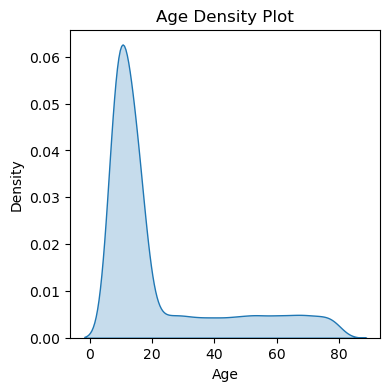

In [42]:
plt.figure(figsize=(4, 4))

sns.kdeplot(df['Age'], shade=True)
plt.title('Age Density Plot')
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()

#### Most Preferred Payment methods

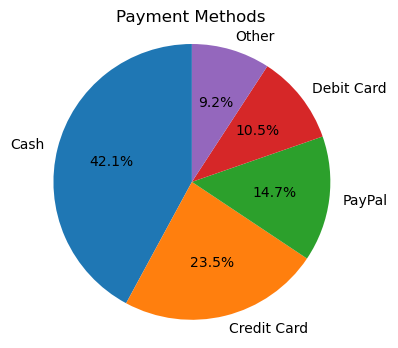

In [18]:
payment_method_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(payment_method_counts, labels=payment_method_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Payment Methods')
plt.axis('equal')  
plt.show()

#### Top 5 Customer Countries

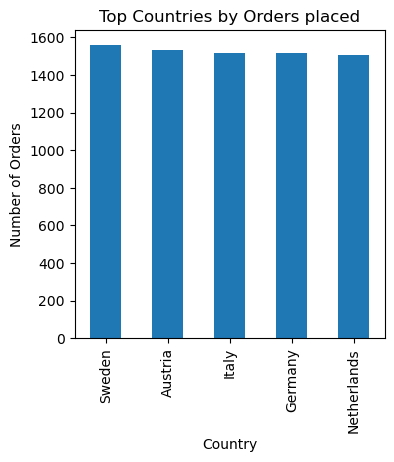

In [19]:
country_orders = df['Country'].value_counts().head()

plt.figure(figsize=(4,4))
country_orders.plot(kind='bar')
plt.title('Top Countries by Orders placed')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

#### Gender wise Total sales

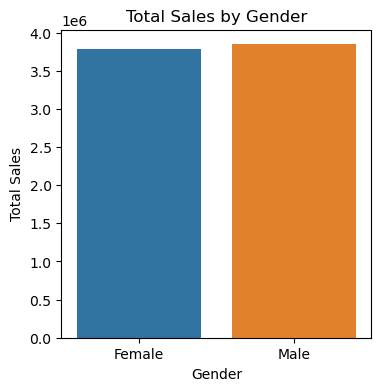

In [20]:
gender_sales = df.groupby('Gender')['Total Sales'].sum().reset_index()

plt.figure(figsize=(4, 4))
sns.barplot(x='Gender', y='Total Sales', data=gender_sales)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')

plt.show()

#### Profit over past years

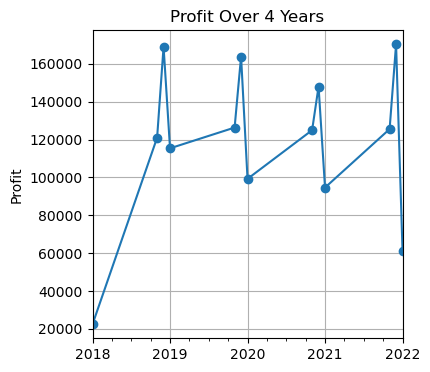

In [22]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_profit = df.groupby('Month')['Profit'].sum()

plt.figure(figsize=(4,4))
monthly_profit.plot(marker='o', linestyle='-')
plt.title('Profit Over 4 Years')
plt.xlabel('')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

### Multivariate Analysis

#### Correlation Matrix

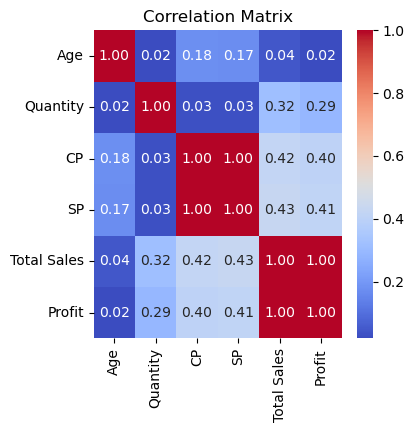

In [23]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Total Sales by Product Type and Gender

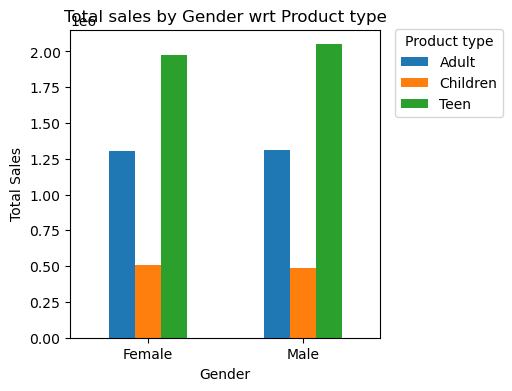

In [24]:
pivot_df = df.pivot_table(index='Gender', columns='Product Type', values='Total Sales', aggfunc='sum')

ax = pivot_df.plot(kind='bar', figsize=(4,4))
ax.set_ylabel('Total Sales')
ax.set_title('Total sales by Gender wrt Product type')
plt.xticks(rotation=0)
plt.legend(title='Product type', bbox_to_anchor=(1.025, 1.025), loc='upper left')
plt.show()